Binomial Mean: 0.9992, Variance: 0.9853993599999998
Poisson Mean: 0.9983, Variance: 0.9920971099999999


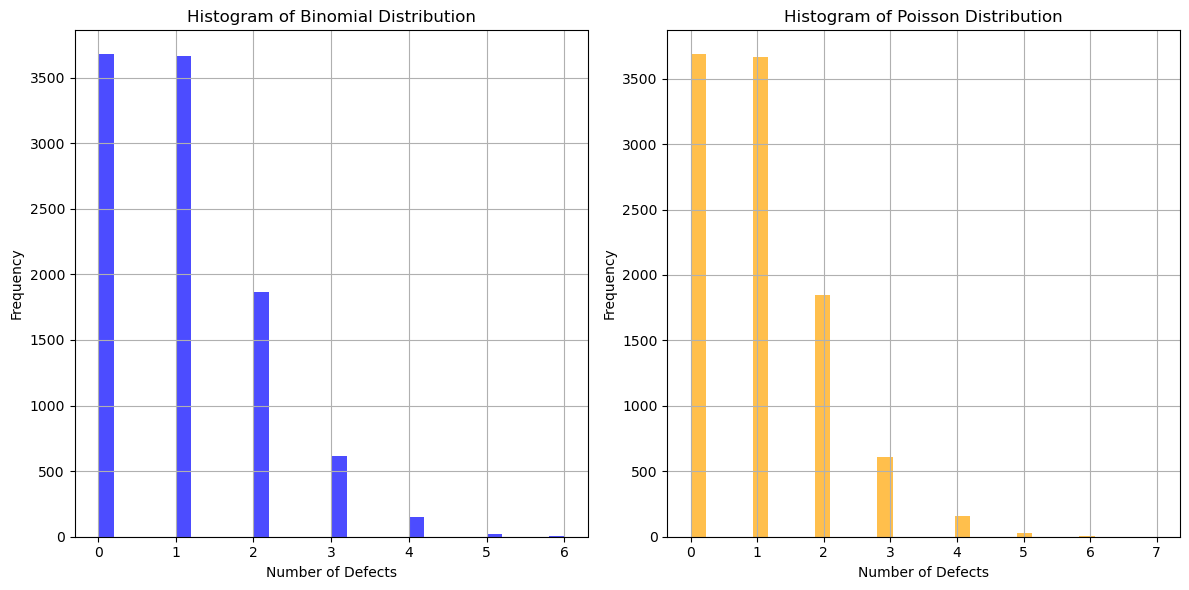

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
n_batches = 10000
n_components = 100
prob_defect = 0.01
lambda_value = 1

# Simulate binomial distribution B(100, 0.01)
binomial_samples = np.random.binomial(n=n_components, p=prob_defect, size=n_batches)

# Simulate Poisson distribution with λ = 1
poisson_samples = np.random.poisson(lam=lambda_value, size=n_batches)

# Calculate means and variances
binomial_mean = np.mean(binomial_samples)
binomial_var = np.var(binomial_samples)
poisson_mean = np.mean(poisson_samples)
poisson_var = np.var(poisson_samples)

print(f"Binomial Mean: {binomial_mean}, Variance: {binomial_var}")
print(f"Poisson Mean: {poisson_mean}, Variance: {poisson_var}")

# Plot histograms comparing the two distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(binomial_samples, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Binomial Distribution')
plt.xlabel('Number of Defects')
plt.ylabel('Frequency')
plt.grid()

plt.subplot(1, 2, 2)
plt.hist(poisson_samples, bins=30, color='orange', alpha=0.7)
plt.title('Histogram of Poisson Distribution')
plt.xlabel('Number of Defects')
plt.ylabel('Frequency')
plt.grid()

plt.tight_layout()
plt.show()

In [2]:
import numpy as np

# Given values
lambda_before = 5  # Poisson parameter before tariff reduction
lambda_after = 7   # Poisson parameter after tariff reduction

intra_tariff_before = 70  # RwF per minute (intra-network) before reduction
inter_tariff_before = 90  # RwF per minute (inter-network) before reduction

intra_tariff_after = 60   # RwF per minute (intra-network) after reduction
inter_tariff_after = 80   # RwF per minute (inter-network) after reduction

intra_ratio = 7 / 10      # Ratio for intra-network calls
inter_ratio = 3 / 10      # Ratio for inter-network calls

repetitions = 100000      # Number of repetitions for simulation

# Simulate Poisson-distributed number of calls for 100,000 repetitions
calls_before = np.random.poisson(lambda_before, repetitions)
calls_after = np.random.poisson(lambda_after, repetitions)

# Simulate revenue before tariff reduction
intra_calls_before = calls_before * intra_ratio
inter_calls_before = calls_before * inter_ratio
revenue_before = (intra_calls_before * intra_tariff_before) + (inter_calls_before * inter_tariff_before)

# Simulate revenue after tariff reduction
intra_calls_after = calls_after * intra_ratio
inter_calls_after = calls_after * inter_ratio
revenue_after = (intra_calls_after * intra_tariff_after) + (inter_calls_after * inter_tariff_after)

# Calculate the probability that revenue exceeds 500 RwF
prob_before_exceeds_500 = np.mean(revenue_before > 500)
prob_after_exceeds_500 = np.mean(revenue_after > 500)

prob_before_exceeds_500, prob_after_exceeds_500


(0.23704, 0.40271)

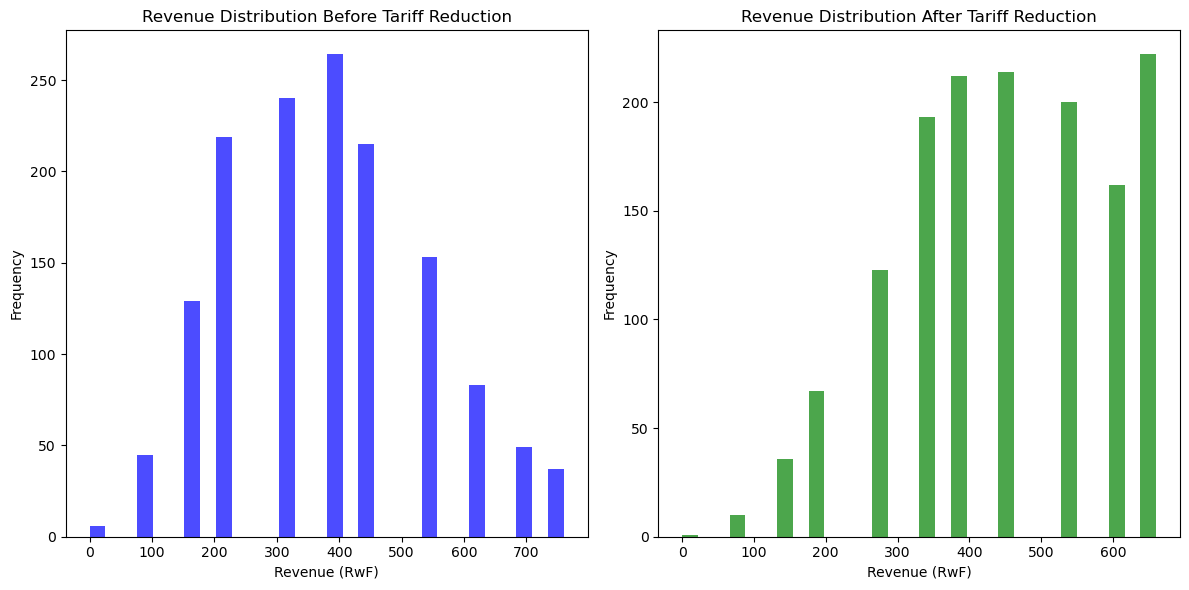

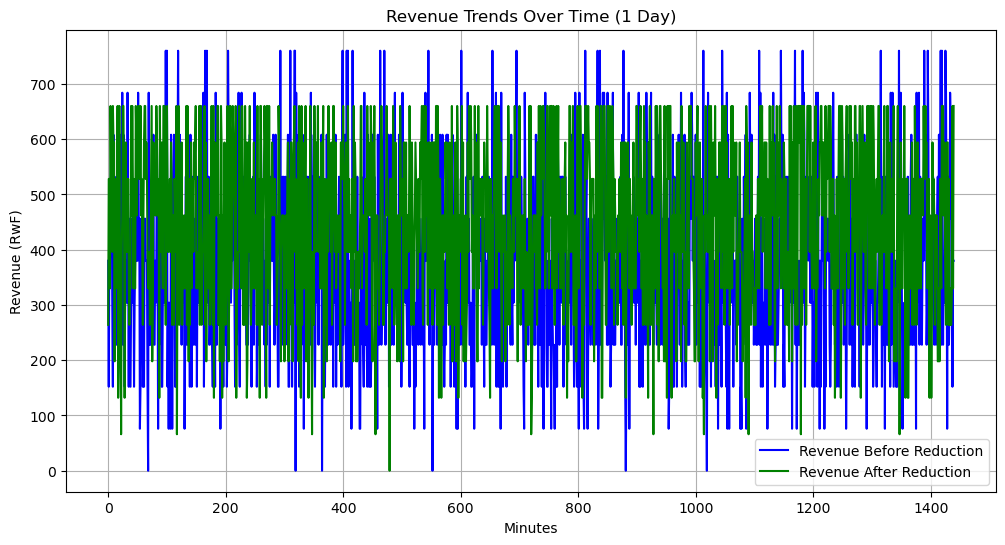

(537776.0, 646008.0, 20.12585165570795)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
lambda_before = 5  # avg calls per minute before reduction
lambda_after = 7  # avg calls per minute after reduction

# Simulate calls for 1440 minutes (1 day)
calls_before = np.random.poisson(lambda_before, 1440)
calls_after = np.random.poisson(lambda_after, 1440)

# Cap the number of calls to a maximum of 10
calls_before[calls_before > 10] = 10
calls_after[calls_after > 10] = 10

# Tariff information
intra_network_before = 70  # RwF per minute
inter_network_before = 90  # RwF per minute
intra_network_after = 60  # RwF per minute
inter_network_after = 80  # RwF per minute

# Ratio of calls
ratio_intra = 7 / 10
ratio_inter = 3 / 10

# Create a DataFrame to hold the results
call_data = pd.DataFrame({
    'Calls_Before_Reduction': calls_before,
    'Calls_After_Reduction': calls_after
})

# Calculate revenues
call_data['Intra_Network_Before'] = call_data['Calls_Before_Reduction'] * ratio_intra
call_data['Inter_Network_Before'] = call_data['Calls_Before_Reduction'] * ratio_inter
call_data['Revenue_Before'] = (call_data['Intra_Network_Before'] * intra_network_before + 
                               call_data['Inter_Network_Before'] * inter_network_before)

call_data['Intra_Network_After'] = call_data['Calls_After_Reduction'] * ratio_intra
call_data['Inter_Network_After'] = call_data['Calls_After_Reduction'] * ratio_inter
call_data['Revenue_After'] = (call_data['Intra_Network_After'] * intra_network_after + 
                              call_data['Inter_Network_After'] * inter_network_after)

# Plot revenue distributions using histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(call_data['Revenue_Before'], bins=30, color='blue', alpha=0.7)
plt.title('Revenue Distribution Before Tariff Reduction')
plt.xlabel('Revenue (RwF)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(call_data['Revenue_After'], bins=30, color='green', alpha=0.7)
plt.title('Revenue Distribution After Tariff Reduction')
plt.xlabel('Revenue (RwF)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Use line plots to visualize the trend in revenue over time
plt.figure(figsize=(12, 6))
plt.plot(call_data['Revenue_Before'], label='Revenue Before Reduction', color='blue')
plt.plot(call_data['Revenue_After'], label='Revenue After Reduction', color='green')
plt.title('Revenue Trends Over Time (1 Day)')
plt.xlabel('Minutes')
plt.ylabel('Revenue (RwF)')
plt.legend()
plt.grid()
plt.show()

# Calculate total revenue for both before and after the tariff reduction
total_revenue_before = call_data['Revenue_Before'].sum()
total_revenue_after = call_data['Revenue_After'].sum()

# Compute the percentage increase in revenue after the tariff reduction
percentage_increase = ((total_revenue_after - total_revenue_before) / total_revenue_before) * 100

total_revenue_before, total_revenue_after, percentage_increase

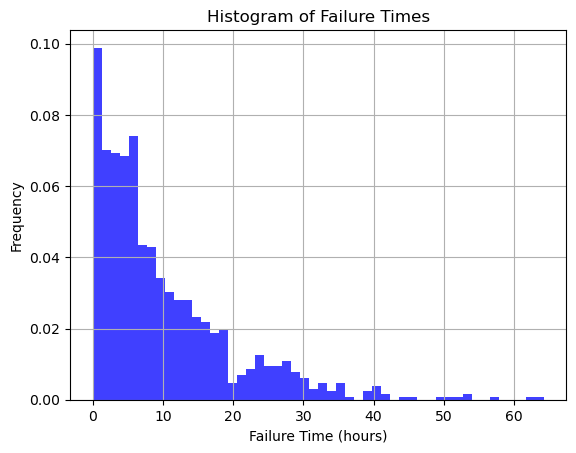

Total downtime over 1000 failures: 9968.98 hours


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
mean_time = 10  # mean time between failures
num_failures = 1000  # number of failures

# Simulate the failure times
failure_times = np.random.exponential(scale=mean_time, size=num_failures)

# Calculate total downtime
total_downtime = np.sum(failure_times)

# Plot the histogram of failure times
plt.hist(failure_times, bins=50, density=True, alpha=0.75, color='blue')
plt.title('Histogram of Failure Times')
plt.xlabel('Failure Time (hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print total downtime
print(f"Total downtime over 1000 failures: {total_downtime:.2f} hours")


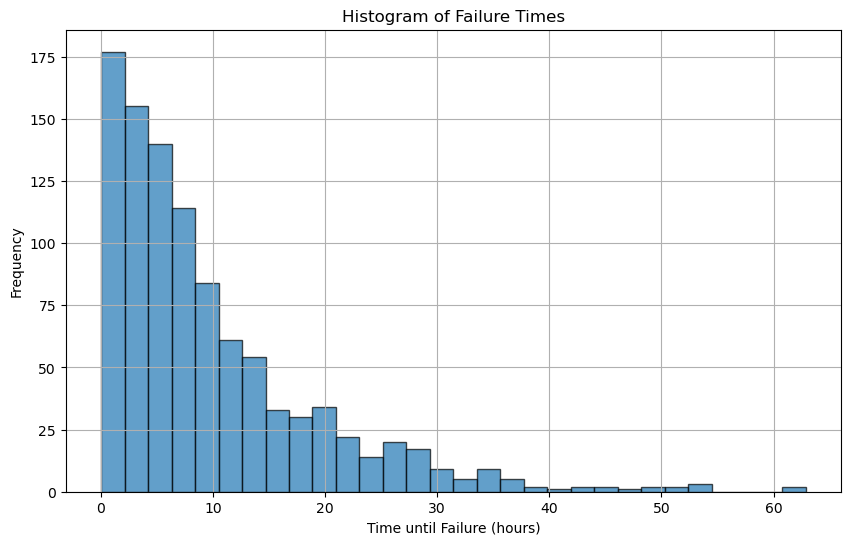

9784.901643189918

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean_time_between_failures = 10  # mean time in hours
num_failures = 1000

# Simulate time until next failure using exponential distribution
# Rate parameter (lambda) is the inverse of the mean
lambda_param = 1 / mean_time_between_failures
failure_times = np.random.exponential(scale=1/lambda_param, size=num_failures)

total_downtime = np.sum(failure_times)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(failure_times, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Failure Times')
plt.xlabel('Time until Failure (hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

total_downtime

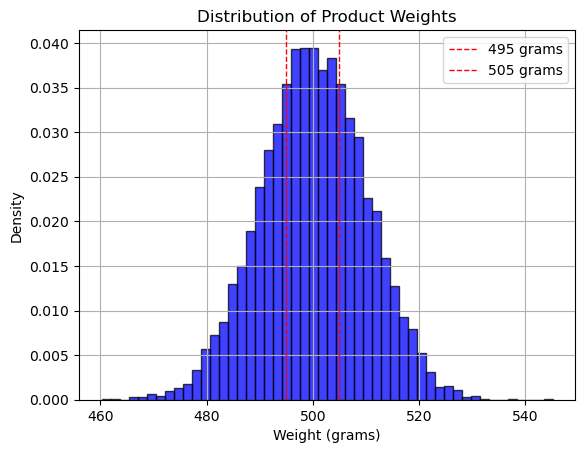

Percentage of products within 495 to 505 grams: 38.45%


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
mean = 500  # mean weight in grams
std_dev = 10  # standard deviation in grams
num_samples = 10000  # number of product weights to simulate

# Simulate product weights from a normal distribution
weights = np.random.normal(loc=mean, scale=std_dev, size=num_samples)

# Calculate the percentage of products within the range of 495 to 505 grams
within_range = np.sum((weights >= 495) & (weights <= 505)) / num_samples * 100

# Plot the distribution of product weights
plt.hist(weights, bins=50, density=True, alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution of Product Weights')
plt.xlabel('Weight (grams)')
plt.ylabel('Density')
plt.grid(True)
plt.axvline(495, color='red', linestyle='dashed', linewidth=1)
plt.axvline(505, color='red', linestyle='dashed', linewidth=1)
plt.legend(['495 grams', '505 grams'])
plt.show()

# Print the result
print(f"Percentage of products within 495 to 505 grams: {within_range:.2f}%")


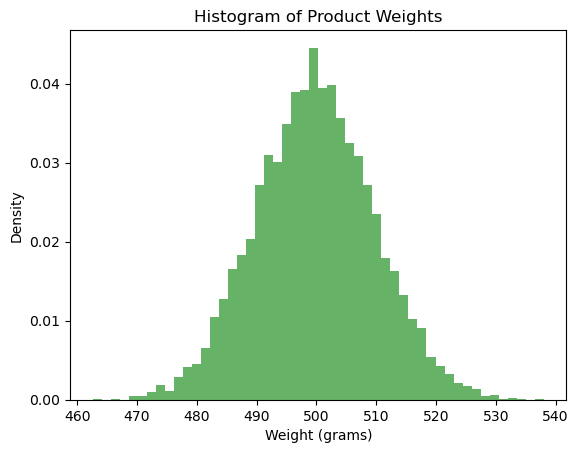

0.3908

In [11]:
import numpy as np
import matplotlib.pyplot as plt


# Given parameters
mu = 500
sigma = 10

# Simulate product weights
np.random.seed(0)
weights = np.random.normal(mu, sigma, 10000)

# Calculate percentage within range [495, 505]
within_range = ((weights >= 495) & (weights <= 505)).mean()

# Plot the distribution
plt.hist(weights, bins=50, density=True, alpha=0.6, color='g')
plt.title('Histogram of Product Weights')
plt.xlabel('Weight (grams)')
plt.ylabel('Density')
plt.show()

within_range

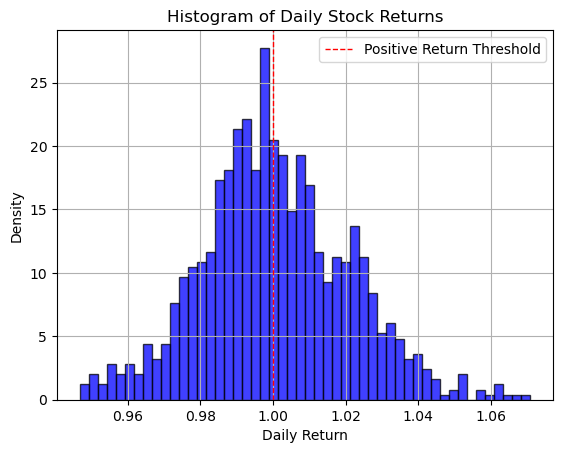

Percentage of days with positive returns: 47.20%


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the lognormal distribution
mu = 0.001
sigma = 0.02
num_days = 1000

# Simulate daily stock returns
daily_returns = np.random.lognormal(mean=mu, sigma=sigma, size=num_days)

# Calculate the proportion of days with positive returns
positive_days = np.sum(daily_returns > 1) / num_days * 100

# Plot the histogram of daily returns
plt.hist(daily_returns, bins=50, density=True, alpha=0.75, color='blue', edgecolor='black')
plt.title('Histogram of Daily Stock Returns')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.grid(True)
plt.axvline(1, color='red', linestyle='dashed', linewidth=1)
plt.legend(['Positive Return Threshold'])
plt.show()

# Print the proportion of positive returns
print(f"Percentage of days with positive returns: {positive_days:.2f}%")


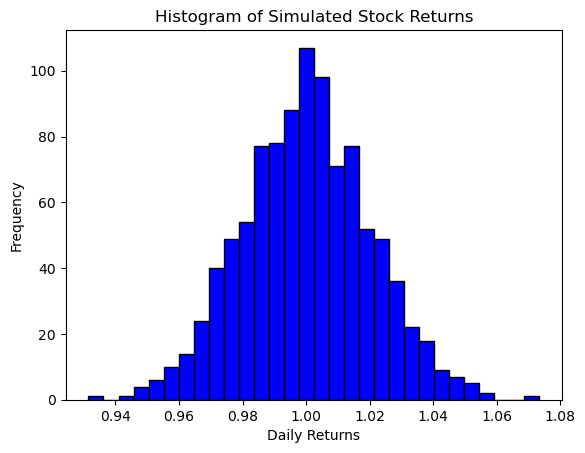

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the lognormal distribution
mu = 0.001
sigma = 0.02
num_days = 1000

# Simulate stock returns
returns = np.random.lognormal(mean=mu, sigma=sigma, size=num_days)

# Plot histogram of simulated stock returns
plt.hist(returns, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Simulated Stock Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

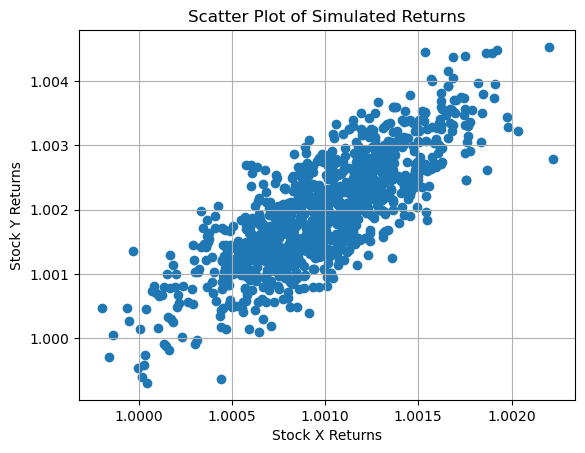

0.7993432245354681

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu_X = 0.001
mu_Y = 0.002
sigma_X = 0.02
sigma_Y = 0.03
rho = 0.8

# Correlation matrix
cov_matrix = [[sigma_X**2, rho * sigma_X * sigma_Y],
              [rho * sigma_X * sigma_Y, sigma_Y**2]]

# Simulating 1,000 days
num_days = 1000
z = np.random.multivariate_normal([0, 0], cov_matrix, num_days)

# Transforming to lognormal
X = np.exp(mu_X + sigma_X * z[:, 0])
Y = np.exp(mu_Y + sigma_Y * z[:, 1])

# Scatter plot
plt.scatter(X, Y)
plt.xlabel('Stock X Returns')
plt.ylabel('Stock Y Returns')
plt.title('Scatter Plot of Simulated Returns')
plt.grid()
plt.show()

# Calculate empirical correlation
empirical_correlation = np.corrcoef(X, Y)[0, 1]
empirical_correlation
